In [2]:
import sys

In [20]:
%load_ext autoreload

%autoreload 2

In [11]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
import data

In [88]:
claims_df = pd.read_csv('C:/Users/Ali/Documents/CIBC/claims_final.csv', header=None, names=['family_id','member_id', 'provider_id', 'provider_type', 'state', 'date', 'procedure', 'amount'])

In [89]:
claims = claims_df.to_records(index=False)

In [90]:
provider_types = np.unique(claims['provider_type'])

In [91]:
claims_pt0 = data.subset_query(claims, lambda item: item['provider_type'] == provider_types[0])

## Provider Type 0: Feature Extraction

Raw features:
* `overcharge`: difference between total amount and the total amount an average provider would have charged for same procedures (5)
* `visits_per_patient`: number of visits per patient (avg, std) (4)
* `n_cases`: number of cases (1)
* `fees_per_patient`: fees per patient (avg, std) (3)
* `total_fees`: total fees

In [298]:
import sklearn
from sklearn.cluster import KMeans
from sklearn import datasets

In [188]:
import features

In [189]:
list_features = ['overcharge', 'visits_per_patient_avg', 'visits_per_patient_std', 'n_cases', 'fees_per_patient_avg','fees_per_patient_std', 'total_fees']

In [276]:
n_cases = len(claims_pt0)
n_features = len(list_features)

In [277]:
subset_claims = np.random.choice(claims_pt0, size=n_cases)

In [281]:
oc, fees = features.compute_overcharge_and_fees(subset_claims)
n_cases = features.compute_cases(subset_claims)
fee_pp_mean, fee_pp_std, visit_pp_mean, visit_pp_std = features.compute_per_patient_stats(subset_claims)

In [282]:
fs = [oc, fees, n_cases, fee_pp_mean, fee_pp_std, visit_pp_mean, visit_pp_std]

In [410]:
f_labels = ['Overcharge', 'Total fees', '# of total cases', 'Per patient fee (mean)', 'Per patient fee (std)', 'Visits per patient(mean)', 'Visits per patient (std)']

In [299]:
X_unscaled = np.stack([list(f.values()) for f in fs],axis=1)

In [475]:
axes_calculated = np.asarray([0,3,5])

In [476]:
X = sklearn.preprocessing.scale(X_unscaled[:,axes_calculated])

In [477]:
clf = sklearn.neighbors.LocalOutlierFactor(n_neighbors=200, contamination=0.01)
y_pred = clf.fit_predict(X)

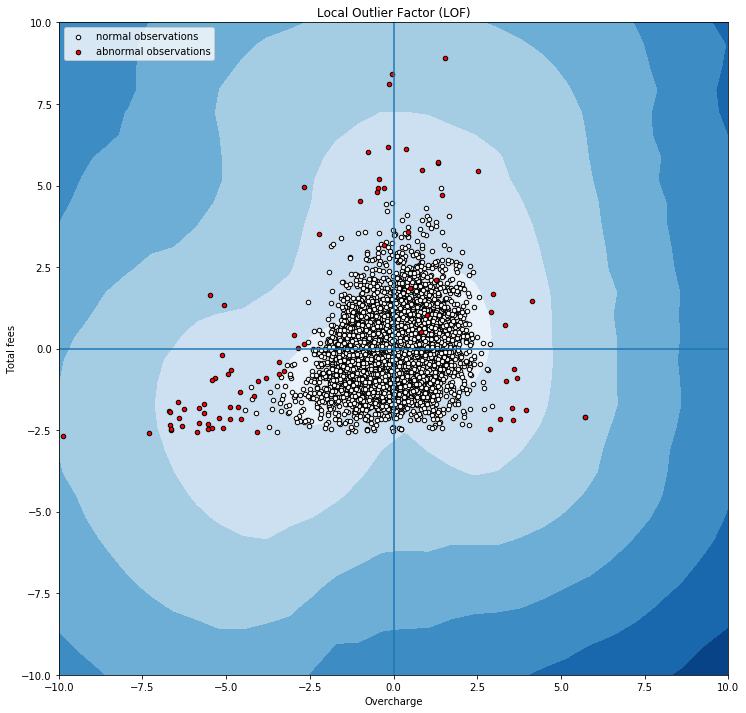

In [479]:
features.plot_clf(clf,X,0,3,y_pred,f_labels,axes_calculated,pmin=-10,pmax=10,points=30)

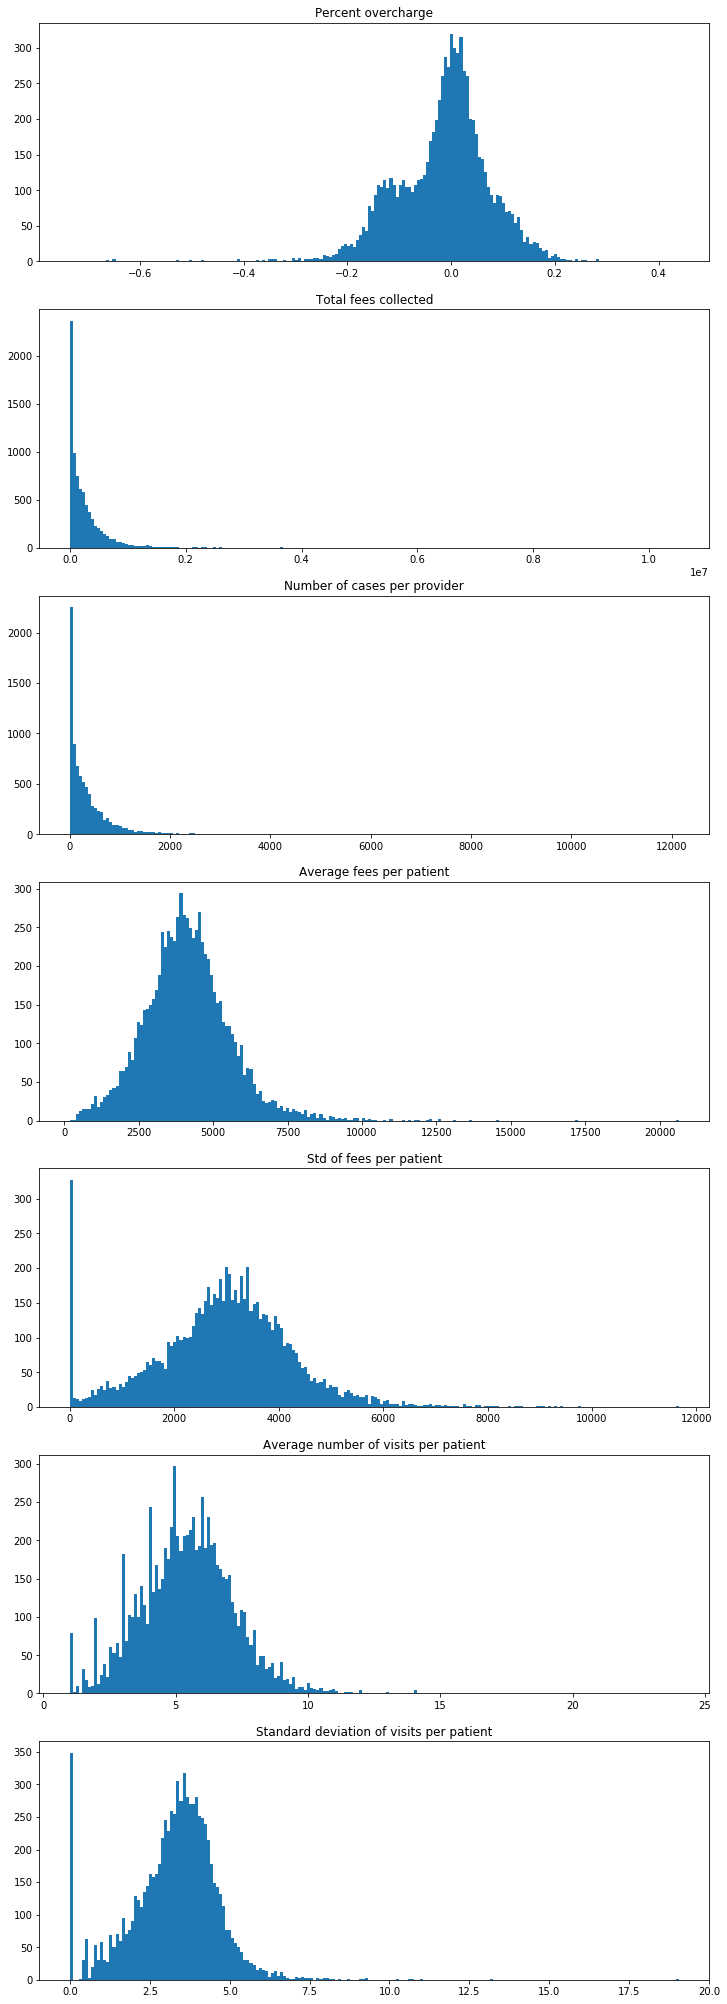

In [266]:
fig, ax = plt.subplots(nrows=7, ncols=1, figsize=(12,36))
ax[0].set_title('Percent overcharge')
ax[0].hist(oc.values(), bins=200);
ax[1].set_title('Total fees collected')
ax[1].hist(fees.values(),bins=200);
ax[2].set_title('Number of cases per provider')
ax[2].hist(n_cases.values(),bins=200);
ax[3].set_title('Average fees per patient')
ax[3].hist(fee_pp_mean.values(),bins=200);
ax[4].set_title('Std of fees per patient')
ax[4].hist(fee_pp_std.values(),bins=200);
ax[5].set_title('Average number of visits per patient')
ax[5].hist(visit_pp_mean.values(),bins=200);
ax[6].set_title('Standard deviation of visits per patient')
ax[6].hist(visit_pp_std.values(),bins=200);